In [1]:
import tensorflow as tf
print(tf.__version__)

2.0.0


# Validation, regularisation and callbacks

 ## Coding tutorials
 #### [1. Validation sets](#coding_tutorial_1)
 #### [2. Model regularisation](#coding_tutorial_2)
 #### [3. Introduction to callbacks](#coding_tutorial_3)
 #### [4. Early stopping / patience](#coding_tutorial_4)

***
<a id="coding_tutorial_1"></a>
## Validation sets

#### Load the data

In [2]:
# Load the diabetes dataset
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(f"diabetes_dataset - {dir(diabetes_dataset)}")
print(diabetes_dataset['DESCR'])


diabetes_dataset - ['DESCR', 'data', 'data_filename', 'feature_names', 'target', 'target_filename']
.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).



In [3]:
# Save the input and target variables
print(type(diabetes_dataset))
print(diabetes_dataset.keys())

data = diabetes_dataset['data']
print(f"data.shape - {data.shape}")
targets = diabetes_dataset['target']
print(f"target.shape - {targets.shape}")

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])
data.shape - (442, 10)
target.shape - (442,)


In [4]:
# Normalise the target data (this will make clearer training curves)
targets = (targets - targets.mean(axis=0)) / targets.std()
targets

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [5]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split

train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(f"train_data.shape - {train_data.shape}")
print(f"test_data.shape - {test_data.shape}")
print(f"train_targets.shape - {train_targets.shape}")
print(f"test_targets.shape - {test_targets.shape}")


train_data.shape - (397, 10)
test_data.shape - (45, 10)
train_targets.shape - (397,)
test_targets.shape - (45,)


#### Train a feedforward neural network model

In [6]:
# Build the model
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(train_data.shape[1], )),
        Dense(128, activation='relu'), 
        Dense(128, activation='relu'), 
        Dense(128, activation='relu'), 
        Dense(128, activation='relu'), 
        Dense(128, activation='relu'), 
        Dense(1)
    ])
    return model

model = get_model()    


In [7]:
# Print the model summary
print(model.summary())    


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [8]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [9]:
# Train the model, with some of the data reserved for validation
history = model.fit(train_data, train_targets, 
                   epochs=100, 
                   validation_split=0.15,
                   batch_size=64, 
                   verbose=2,
                   )


Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 1.0461 - mae: 0.8813 - val_loss: 0.7649 - val_mae: 0.7429
Epoch 2/100
337/337 - 0s - loss: 0.9516 - mae: 0.8445 - val_loss: 0.6526 - val_mae: 0.6878
Epoch 3/100
337/337 - 0s - loss: 0.7195 - mae: 0.7377 - val_loss: 0.5503 - val_mae: 0.6068
Epoch 4/100
337/337 - 0s - loss: 0.5444 - mae: 0.5835 - val_loss: 0.5458 - val_mae: 0.5905
Epoch 5/100
337/337 - 0s - loss: 0.4945 - mae: 0.5502 - val_loss: 0.4731 - val_mae: 0.5581
Epoch 6/100
337/337 - 0s - loss: 0.4724 - mae: 0.5543 - val_loss: 0.5515 - val_mae: 0.6127
Epoch 7/100
337/337 - 0s - loss: 0.4653 - mae: 0.5408 - val_loss: 0.4363 - val_mae: 0.5107
Epoch 8/100
337/337 - 0s - loss: 0.4567 - mae: 0.5316 - val_loss: 0.5666 - val_mae: 0.6229
Epoch 9/100
337/337 - 0s - loss: 0.4575 - mae: 0.5295 - val_loss: 0.5071 - val_mae: 0.5766
Epoch 10/100
337/337 - 0s - loss: 0.4767 - mae: 0.5502 - val_loss: 0.4602 - val_mae: 0.5254
Epoch 11/100
337/337 - 0s - loss: 0.4495 - m

Epoch 90/100
337/337 - 0s - loss: 0.0493 - mae: 0.1638 - val_loss: 1.0083 - val_mae: 0.7705
Epoch 91/100
337/337 - 0s - loss: 0.0532 - mae: 0.1691 - val_loss: 0.9607 - val_mae: 0.7386
Epoch 92/100
337/337 - 0s - loss: 0.0472 - mae: 0.1555 - val_loss: 1.0031 - val_mae: 0.7533
Epoch 93/100
337/337 - 0s - loss: 0.0474 - mae: 0.1595 - val_loss: 1.0375 - val_mae: 0.7721
Epoch 94/100
337/337 - 0s - loss: 0.0510 - mae: 0.1651 - val_loss: 0.9708 - val_mae: 0.7523
Epoch 95/100
337/337 - 0s - loss: 0.0422 - mae: 0.1460 - val_loss: 0.9838 - val_mae: 0.7515
Epoch 96/100
337/337 - 0s - loss: 0.0391 - mae: 0.1447 - val_loss: 0.9597 - val_mae: 0.7301
Epoch 97/100
337/337 - 0s - loss: 0.0369 - mae: 0.1393 - val_loss: 1.0020 - val_mae: 0.7565
Epoch 98/100
337/337 - 0s - loss: 0.0326 - mae: 0.1263 - val_loss: 1.0019 - val_mae: 0.7574
Epoch 99/100
337/337 - 0s - loss: 0.0322 - mae: 0.1304 - val_loss: 1.0643 - val_mae: 0.8027
Epoch 100/100
337/337 - 0s - loss: 0.0473 - mae: 0.1646 - val_loss: 1.0265 - val

In [10]:
# Evaluate the model on the test set

model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.6396 - mae: 0.6309


[0.6984007649951511, 0.6309358]

#### Plot the learning curves

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

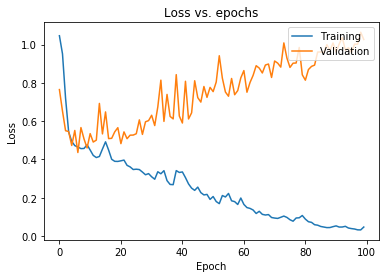

In [12]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_2"></a>
## Model regularisation

#### Adding regularisation with weight decay and dropout

In [13]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [14]:
def get_regularised_model(wd, rate):
    """
    :wd - weight decay
    """
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu", input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation="relu"),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [15]:
# Re-build the model with weight decay and dropout layers
model = get_regularised_model(1e-5, 0.3)


In [16]:
# Compile the model
model.compile(optimizer='adam', 
             loss='mse', 
             metrics=['mae'])


In [17]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, 
                    epochs=100, 
                    validation_split=0.15,
                    batch_size=64,
                    verbose=2)

Train on 337 samples, validate on 60 samples
Epoch 1/100
337/337 - 2s - loss: 1.0694 - mae: 0.8858 - val_loss: 0.7989 - val_mae: 0.7533
Epoch 2/100
337/337 - 0s - loss: 1.0633 - mae: 0.8847 - val_loss: 0.7928 - val_mae: 0.7507
Epoch 3/100
337/337 - 0s - loss: 1.0479 - mae: 0.8777 - val_loss: 0.7663 - val_mae: 0.7372
Epoch 4/100
337/337 - 0s - loss: 0.9907 - mae: 0.8518 - val_loss: 0.6816 - val_mae: 0.6888
Epoch 5/100
337/337 - 0s - loss: 0.8732 - mae: 0.7919 - val_loss: 0.5604 - val_mae: 0.6105
Epoch 6/100
337/337 - 0s - loss: 0.7164 - mae: 0.6910 - val_loss: 0.5905 - val_mae: 0.6240
Epoch 7/100
337/337 - 0s - loss: 0.6265 - mae: 0.6411 - val_loss: 0.5928 - val_mae: 0.6106
Epoch 8/100
337/337 - 0s - loss: 0.5808 - mae: 0.6078 - val_loss: 0.5239 - val_mae: 0.5860
Epoch 9/100
337/337 - 0s - loss: 0.5954 - mae: 0.6323 - val_loss: 0.5221 - val_mae: 0.6043
Epoch 10/100
337/337 - 0s - loss: 0.5867 - mae: 0.6319 - val_loss: 0.5078 - val_mae: 0.5788
Epoch 11/100
337/337 - 0s - loss: 0.5663 - m

Epoch 90/100
337/337 - 0s - loss: 0.3370 - mae: 0.4507 - val_loss: 0.6210 - val_mae: 0.5966
Epoch 91/100
337/337 - 0s - loss: 0.4044 - mae: 0.5023 - val_loss: 0.5888 - val_mae: 0.5872
Epoch 92/100
337/337 - 0s - loss: 0.3689 - mae: 0.4688 - val_loss: 0.5696 - val_mae: 0.5693
Epoch 93/100
337/337 - 0s - loss: 0.3952 - mae: 0.4931 - val_loss: 0.5738 - val_mae: 0.5628
Epoch 94/100
337/337 - 0s - loss: 0.3645 - mae: 0.4821 - val_loss: 0.5808 - val_mae: 0.5833
Epoch 95/100
337/337 - 0s - loss: 0.3285 - mae: 0.4600 - val_loss: 0.6038 - val_mae: 0.5772
Epoch 96/100
337/337 - 0s - loss: 0.3494 - mae: 0.4649 - val_loss: 0.6338 - val_mae: 0.5866
Epoch 97/100
337/337 - 0s - loss: 0.3542 - mae: 0.4666 - val_loss: 0.6236 - val_mae: 0.5957
Epoch 98/100
337/337 - 0s - loss: 0.3598 - mae: 0.4758 - val_loss: 0.5969 - val_mae: 0.5886
Epoch 99/100
337/337 - 0s - loss: 0.3539 - mae: 0.4756 - val_loss: 0.5944 - val_mae: 0.5730
Epoch 100/100
337/337 - 0s - loss: 0.3322 - mae: 0.4535 - val_loss: 0.6308 - val

In [18]:
# Evaluate the model on the test set
model.evaluate(test_data, test_targets, verbose=2)


45/1 - 0s - loss: 0.5388 - mae: 0.5908


[0.552070000436571, 0.5908069]

#### Plot the learning curves

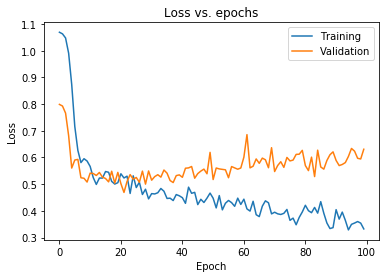

In [19]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()

***
<a id="coding_tutorial_3"></a>
## Introduction to callbacks

#### Example training callback

In [20]:
# Write a custom callback
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_brgin(self, logs=None):
        print('Starting Training...')
        
    def on_epoch_begin(self, epoch, logs=None):
        print(f"Starting epoch {epoch}")
        
    def on_train_batch_begin(self, batch, logs=None):
        print(f"Training: Starting batch {batch}")
        
    def on_train_batch_end(self, batch, logs=None):
        print(f"Training: Finished batch {batch}")
        
    def on_epoch_end(self, epoch, logs=None):
        print(f"Finished epoch {epoch}")
        
    def on_train_end(self, logs=None):
        print('Finished Training!')


In [21]:
class TestingCallback(Callback):
    
    def on_test_begin(self, logs=None):
        print('Starting Testing...')
              
    def on_test_batch_begin(self, batch, logs=None):
        print(f"Testing: Starting batch {batch}")
        
    def on_test_batch_end(self, batch, logs=None):
        print(f"Testing: Finished batch {batch}")
        
    def on_train_end(self, logs=None):
        print('Finished Testing!')
        

In [22]:
class PredictionCallback(Callback):
    
    def on_predict_begin(self, logs=None):
        print('Starting prediction...')
              
    def on_predict_batch_begin(self, batch, logs=None):
        print(f"Predicting: Starting batch {batch}")
        
    def on_predict_batch_end(self, batch, logs=None):
        print(f"Predicting: Finished batch {batch}")
        
    def on_predict_end(self, logs=None):
        print('Finished prediction!')
        

In [23]:
# Re-build the model

model = get_regularised_model(1e-5, 0.3)

In [24]:
# Compile the model
model.compile(optimizer='adam', loss='mse')


#### Train the model with the callback

In [25]:
# Train the model, with some of the data reserved for validation

history = model.fit(train_data, train_targets, 
                    epochs=5, 
#                     validation_split=0.15,
                    batch_size=128,
                    verbose=2, 
                   callbacks=[TrainingCallback()])

Train on 397 samples
Starting epoch 0
Epoch 1/5
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 0
397/397 - 3s - loss: 1.0243
Starting epoch 1
Epoch 2/5
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 1
397/397 - 0s - loss: 1.0194
Starting epoch 2
Epoch 3/5
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Training: Finished batch 1
Training: Starting batch 2
Training: Finished batch 2
Training: Starting batch 3
Training: Finished batch 3
Finished epoch 2
397/397 - 0s - loss: 1.0039
Starting epoch 3
Epoch 4/5
Training: Starting batch 0
Training: Finished batch 0
Training: Starting batch 1
Trainin

In [26]:
# Evaluate the model
model.evaluate(test_data, test_targets, callbacks=[TestingCallback()], verbose=2)


Starting Testing...
Testing: Starting batch 0
Testing: Finished batch 0
Testing: Starting batch 1
Testing: Finished batch 1
45/1 - 0s - loss: 0.5504


0.6678491334120432

In [27]:
# Make predictions with the model
model.predict(test_data, verbose=2, callbacks=[PredictionCallback()])


Starting prediction...
Predicting: Starting batch 0
Predicting: Finished batch 0
Predicting: Starting batch 1
Predicting: Finished batch 1
45/1 - 0s
Finished prediction!


array([[-0.34940124],
       [-0.29282165],
       [-0.16912293],
       [-0.28378016],
       [-0.18909371],
       [-0.0542355 ],
       [-0.3473892 ],
       [ 0.27810198],
       [-0.3025587 ],
       [ 0.34562552],
       [-0.3089454 ],
       [ 0.1433143 ],
       [-0.05263428],
       [-0.30771676],
       [ 0.13624536],
       [ 0.16274385],
       [ 0.08252316],
       [-0.28158733],
       [ 0.22279054],
       [-0.03322647],
       [ 0.29216623],
       [ 0.13130698],
       [-0.267048  ],
       [-0.21823077],
       [ 0.2632413 ],
       [ 0.05531208],
       [ 0.21378489],
       [-0.2727641 ],
       [-0.22318241],
       [ 0.18143153],
       [ 0.00819118],
       [ 0.09337106],
       [-0.3350926 ],
       [-0.2927976 ],
       [ 0.14461257],
       [-0.27263334],
       [-0.3046277 ],
       [ 0.28375095],
       [-0.06220724],
       [ 0.27011   ],
       [-0.31306693],
       [-0.00539614],
       [-0.24455191],
       [ 0.35561702],
       [-0.16900185]], dtype=flo

***
<a id="coding_tutorial_4"></a>
## Early stopping / patience

#### Re-train the models with early stopping

In [28]:
# Re-train the unregularised model

unregularised_model = get_model()
unregularised_model.compile(optimizer='adam', loss='mse')
unregularised_model_history = unregularised_model.fit(train_data, train_targets, 
                                                     epochs=100,
                                                     validation_split=0.15, 
                                                     batch_size=64, 
                                                     verbose=False, 
                                                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])

In [29]:
# Evaluate the model on the test set

unregularised_model.evaluate(test_data, test_targets, verbose=2)

45/1 - 0s - loss: 0.5109


0.5362446639272902

In [30]:
# Re-train the regularised model
regularised_model = get_regularised_model(1e-8, 0.2)
regularised_model.compile(optimizer='adam', loss='mse')
regularised_model_history = regularised_model.fit(train_data, train_targets, 
                                                     epochs=100,
                                                     validation_split=0.15, 
                                                     batch_size=64, 
                                                     verbose=False, 
                                                     callbacks=[tf.keras.callbacks.EarlyStopping(patience=10)])


In [31]:
# Evaluate the model on the test set
regularised_model.evaluate(test_data, test_targets, verbose=2)


45/1 - 0s - loss: 0.4686


0.5120073199272156

#### Plot the learning curves

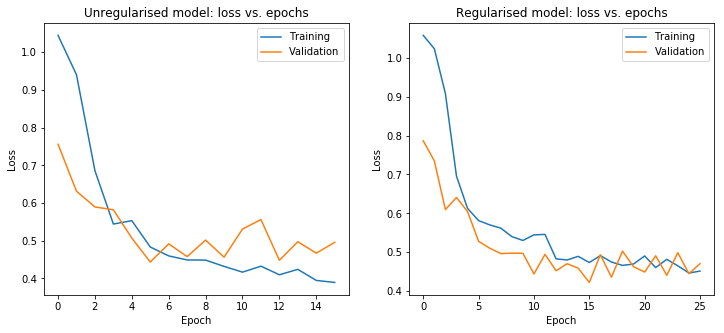

In [32]:
# Plot the training and validation loss

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))

fig.add_subplot(121)

plt.plot(unregularised_model_history.history['loss'])
plt.plot(unregularised_model_history.history['val_loss'])
plt.title('Unregularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

fig.add_subplot(122)

plt.plot(regularised_model_history.history['loss'])
plt.plot(regularised_model_history.history['val_loss'])
plt.title('Regularised model: loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')

plt.show()